In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm
import keras
from keras import layers
from keras import ops
from sklearn.model_selection import train_test_split

# Homework 11
## Problem 1
### Part a

In [260]:
Default = pd.read_csv('C:\\Users\\lorentsen\\Documents\\Python\\Math-180-Applied-Statistics-and-Machine-Learning\\ISLRv2_data\\ALL CSV FILES - 2nd Edition\\Default.csv')

x = Default.drop('default', axis=1) 
x['student'] = x['student'].map({'No': 0, 'Yes': 1})
x = x.astype('float64')

Default['default'] = Default['default'].map({'No': 0, 'Yes': 1})

for i in range(0, x.shape[1]): #Standardizing the data
    x.iloc[:,i] = (x.iloc[:, i] - x.iloc[:, i].mean())/x.iloc[:, i].std()
    
x_train, x_test, y_train, y_test = train_test_split(x, Default['default'], test_size=0.2, random_state=42)

### Part b)

In [261]:
modelnn = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\lorentsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### part c)

In [262]:
# modelnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# modelnn.fit(x_train, y_train, epochs=100, batch_size=10, verbose = 0)
# modelnn.save('modelnn.keras')

In [263]:
modelnn = keras.models.load_model('modelnn.keras')

### part d)

In [264]:
modelnn.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9632 - loss: 0.1023 


[0.08910542726516724, 0.9700000286102295]

In [265]:
from sklearn.metrics import accuracy_score

In [266]:
print(accuracy_score(y_test, modelnn.predict(MS(x_test, intercept = False).fit_transform(x_test)) > 0.5))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.97


### part e)

In [267]:
import statsmodels.api as sm
import time
import itertools
from ISLP.models import (ModelSpec as MS,
                         summarize, poly)

In [268]:
X = MS(x_train, intercept = True).fit_transform(x_train)
model = sm.GLM(y_train, X, family=sm.families.Binomial()).fit()
# print(model.summary())
print(accuracy_score(y_test, model.predict(MS(x_test, intercept = True).fit_transform(x_test)) > 0.5))


0.9695


It's exactly as good.

## Problem 2
### Part a)

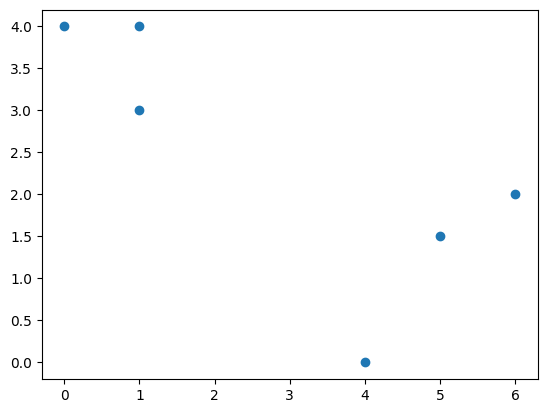

In [269]:
m = np.array([[1, 4], [1,3], [0,4], [5,1.5], [6, 2], [4,0]])
plt.plot(m[:,0], m[:,1], 'o');

### Part b)

In [270]:
cluster_labels = np.random.randint(0, 2, m.shape[0])
cluster_labels

array([0, 0, 0, 0, 0, 1])

### part c)

In [271]:
centroid1 = np.mean(m[cluster_labels == 0], axis=0)
centroid2 = np.mean(m[cluster_labels == 1], axis=0)
print(centroid1, centroid2)

[2.6 2.9] [4. 0.]


In [272]:
# m[cluster_labels == 0]
# m[cluster_labels == 1]

### part d)

In [273]:
cluster_labels = np.array([0 if np.linalg.norm(centroid1 - element) < np.linalg.norm(centroid2 - element) else 1 for element in m])
cluster_labels

array([0, 0, 0, 1, 1, 1])

### part e)

In [274]:
last_cluster_labels = np.ones(m.shape[0])*-1

while (last_cluster_labels != cluster_labels).all():
    centroid1 = np.mean(m[cluster_labels == 0], axis=0)
    centroid2 = np.mean(m[cluster_labels == 1], axis=0)
    last_cluster_labels = cluster_labels
    cluster_labels = np.array([0 if np.linalg.norm(centroid1 - element) < np.linalg.norm(centroid2 - element) else 1 for element in m])
    print(cluster_labels)

[0 0 0 1 1 1]


### part f)

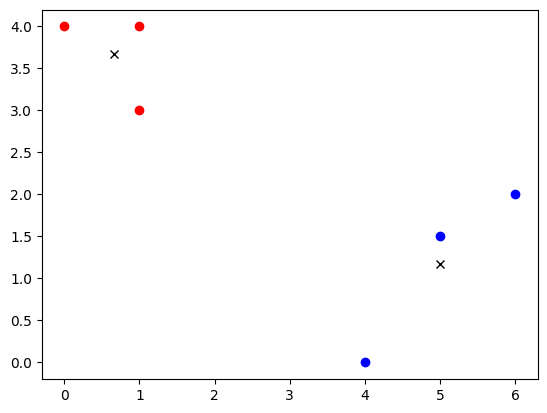

In [275]:
colours = ['r', 'b']

for i in range(2):
    plt.plot(m[:,0][cluster_labels == i], m[:,1][cluster_labels == i], 'o', color = colours[i])

plt.plot(centroid1[0],centroid1[1], 'x', color = 'black')
plt.plot(centroid2[0],centroid2[1], 'x', color = 'black');


## Problem 3
### Part a)

In [276]:
USArrests = pd.read_csv('USArrests.csv')
USArrests.index = USArrests['rownames']
USArrests.drop('rownames', axis=1, inplace=True)

USArrests = USArrests.astype('float64')


for i in range(1, USArrests.shape[1]): #Standardizing the data
    USArrests.iloc[:,i] = (USArrests.iloc[:, i] - USArrests.iloc[:, i].mean())/USArrests.iloc[:, i].std()

In [277]:
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram,
                                     cut_tree)
from ISLP.cluster import compute_linkage

In [323]:
## From the book ##
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [ ]:
## From the book ##
X = USArrests.values

D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X- x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,n_clusters=None,metric='precomputed',linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

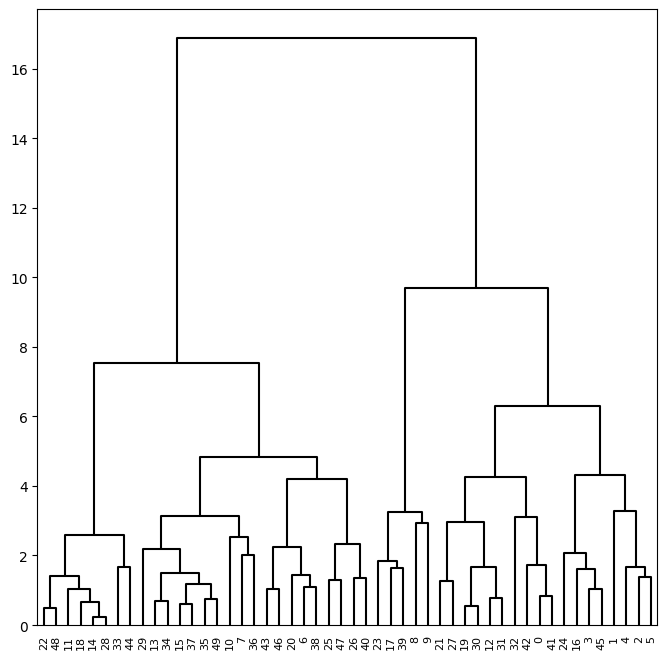

In [ ]:
## From the book ##
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

### Part b)

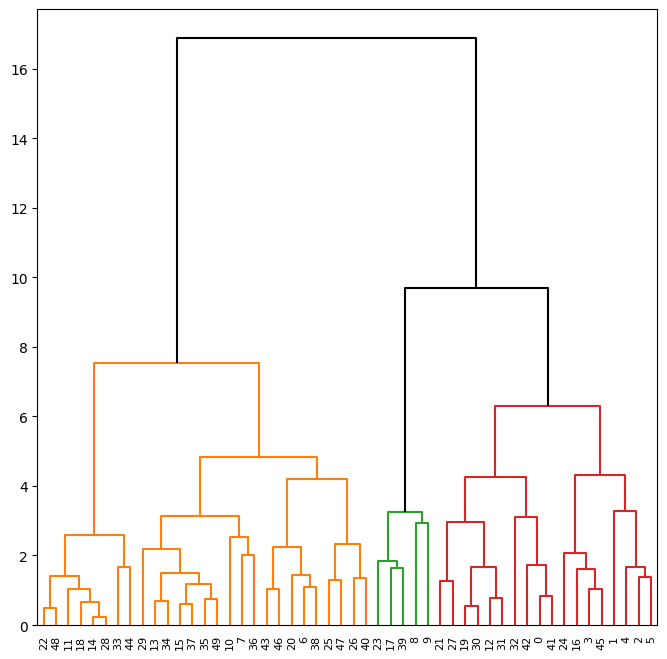

In [316]:
#We cut it at 9
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=9, above_threshold_color='black');

### part c)

In [287]:
from sklearn.decomposition import PCA

In [298]:
USA_pca = PCA()
USA_scores = USA_pca.fit_transform(USArrests)


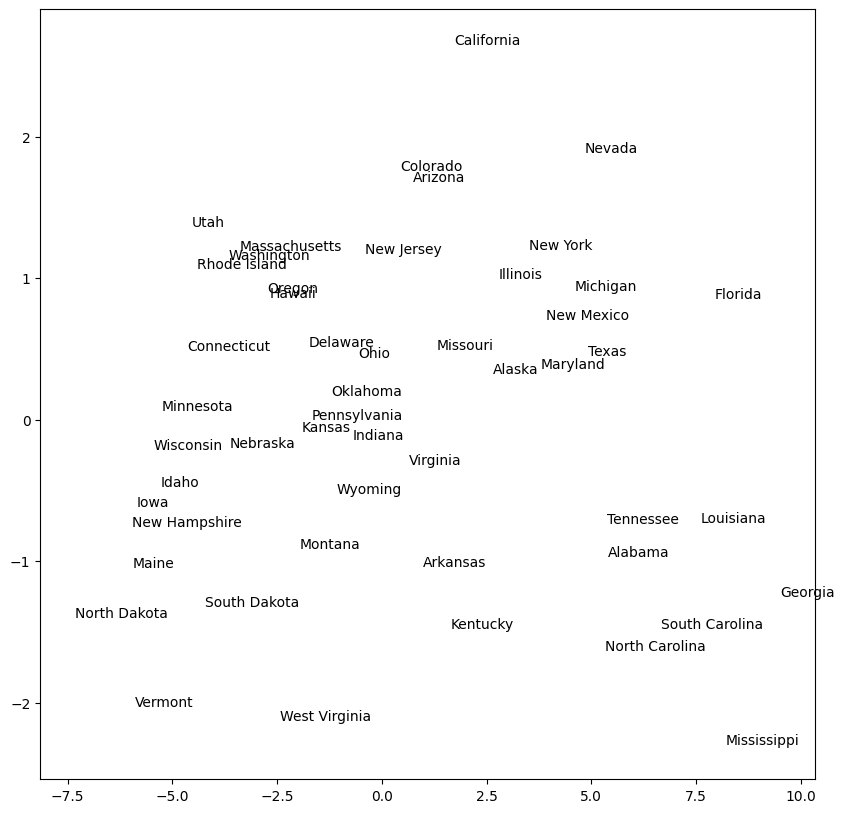

In [314]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(USA_scores[:,0], USA_scores[:,1], 'o', markersize = 0);
for i in range(len(USArrests.index)):
    plt.text(USA_scores[:,0][i], USA_scores[:,1][i], USArrests.index[i])
# plt.text(USA_scores[:,0][0], USA_scores[:,1][0], USArrests.index[0]);

### part d)

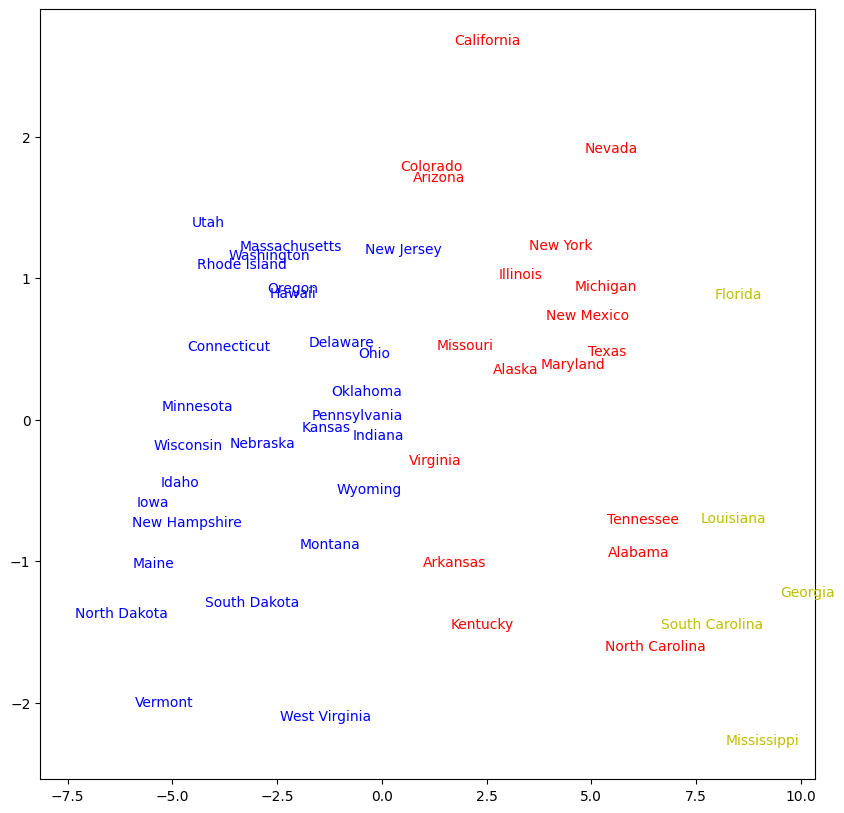

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(USA_scores[:,0], USA_scores[:,1], 'o', markersize = 0);
colours = ['r', 'b', 'y']
clusters = cut_tree(linkage_comp, height=9)
for i in range(len(USArrests.index)):
    plt.text(USA_scores[:,0][i], USA_scores[:,1][i], USArrests.index[i], c = colours[clusters[i][0]])

Yes, there are clearly defined lines.

### part e)

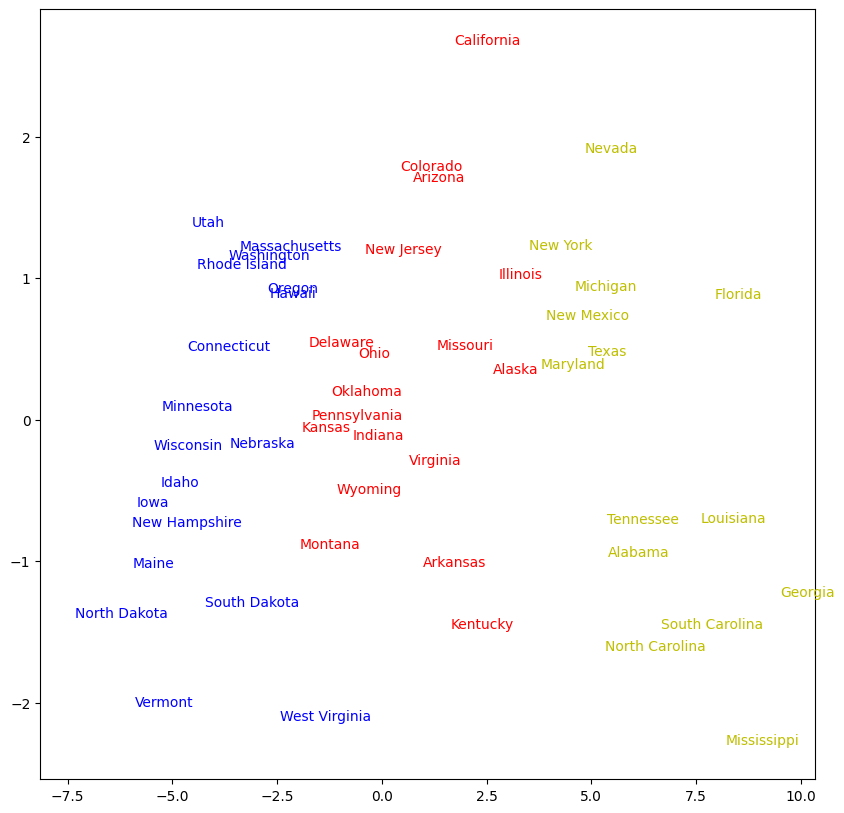

In [364]:
clusters = cut_tree(linkage_comp, height=9)
USA_kmeans = KMeans(n_clusters=3, random_state=0, n_init=20).fit(USArrests)
USA_kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(USA_scores[:,0], USA_scores[:,1], 'o', markersize = 0);
colours = ['b', 'y', 'r']
clusters = USA_kmeans.labels_

for i in range(len(USArrests.index)):
    plt.text(USA_scores[:,0][i], USA_scores[:,1][i], USArrests.index[i], c = colours[clusters[i]])

Now the yellow cluster is larger,although the results are fairly similar.